In [2]:
import os                                                             #for interacting with os for files 
import cv2                                                            #part of openCV for image processing tasks
import pandas as pd                                                   #handling and managing datas
import numpy as np                                                    #for numerical operations
import matplotlib.pyplot as plt                                       #used to create visualizations
import seaborn as sns                                                 #advance visulazation tools
from sklearn.metrics import confusion_matrix, classification_report   #for evaluating ml models by generating metrics
from sklearn.model_selection import train_test_split                  #splits the data for model evaluation and validation
import tensorflow as tf                                               #deeplearning framework for creating and training neural networks
from tensorflow.keras.models import Sequential                        #used to define a feed forward model by stacking layers sequentially
from tensorflow.keras.layers import Dropout             #manipulates neurons in neural network
from tensorflow.keras.metrics import Recall, Precision                #metrics to evaluate model performance
from tensorflow.keras.preprocessing.image import ImageDataGenerator   #for agumentation
from tensorflow.keras.optimizers import Adam                          #adjusts the learning rate during training
from tensorflow.keras.applications import InceptionV3      #pretrained deeplearing models for transfer learning
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Input,concatenate,Dense, GlobalAveragePooling2D, Flatten                #for input layer and merging multiple layers
from tensorflow.keras.models import Model, clone_model                            #enables builiding complex model, allowing more flexible network
from tensorflow.keras.callbacks import EarlyStopping                  #monitors model performance and stops the training of model to prevent overfitting and saves time

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv")

In [ ]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

Normal (N),
Diabetes (D),
Glaucoma (G),
Cataract (C),
Age related Macular Degeneration (A),
Hypertension (H),
Pathological Myopia (M),
Other diseases/abnormalities (O)

In [ ]:
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [ ]:
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='labels', ylabel='Patient Age'>

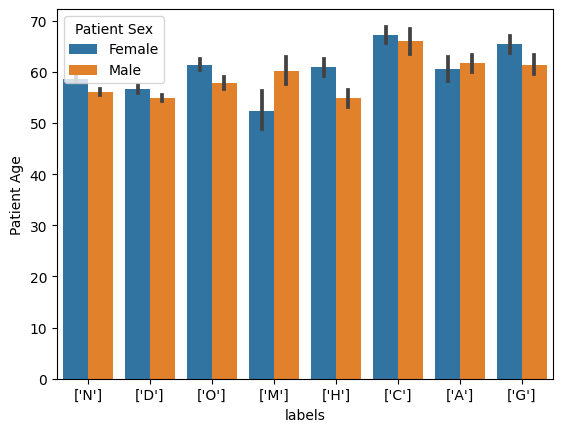

In [ ]:
sns.barplot(data=df, x="labels", y="Patient Age", hue="Patient Sex")

In [ ]:
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

In [ ]:
df.columns

Index(['Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [ ]:
df['Patient Sex'].value_counts()

Patient Sex
Male      3424
Female    2968
Name: count, dtype: int64

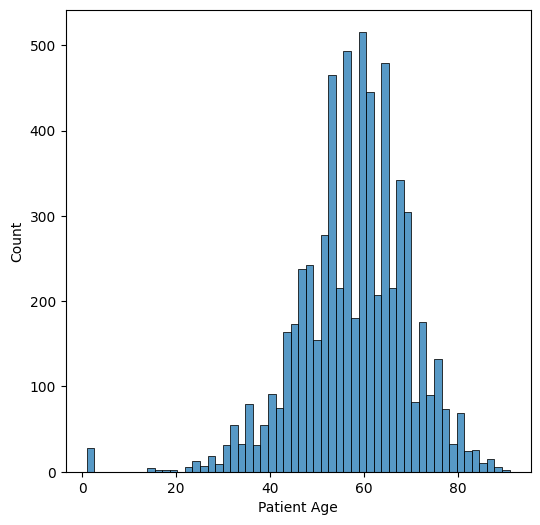

In [ ]:
import warnings

# Suppress specific warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    plt.figure(figsize=(6, 6))
    sns.histplot(data=df, x="Patient Age")


([<matplotlib.patches.Wedge at 0x7fa6d43962f0>,
 [Text(0.2055101877331841, 1.2836532096862734, 'Normal'),
  Text(-1.0594468214361001, -0.5419155215981034, 'Diabetes'),
  Text(0.04432008452473661, -1.0991067873995322, 'Glaucoma'),
  Text(0.5582506611218526, -0.9478165430910218, 'Cataract'),
  Text(0.8011544593128657, -0.7537582718107378, 'Age related Macular Degeneration'),
  Text(0.9733436509785615, -0.5124472042071498, 'Hypertension'),
  Text(1.068511927516186, -0.2613087460374127, 'Pathological Myopia'),
  Text(1.0978239573964101, -0.0691560450465866, 'Other diseases/abnormalities')],
 [Text(0.1264678078358056, 0.7899404367300144, '44.9%'),
  Text(-0.614301098143621, -0.3142199242879759, '25.2%'),
  Text(0.024174591558947238, -0.5995127931270176, '11.1%'),
  Text(0.30450036061191954, -0.5169908416860118, '4.6%'),
  Text(0.4369933414433812, -0.41114087553312967, '4.4%'),
  Text(0.5309147187155789, -0.27951665684026356, '4.2%'),
  Text(0.5828246877361014, -0.1425320432931342, '3.6%'),


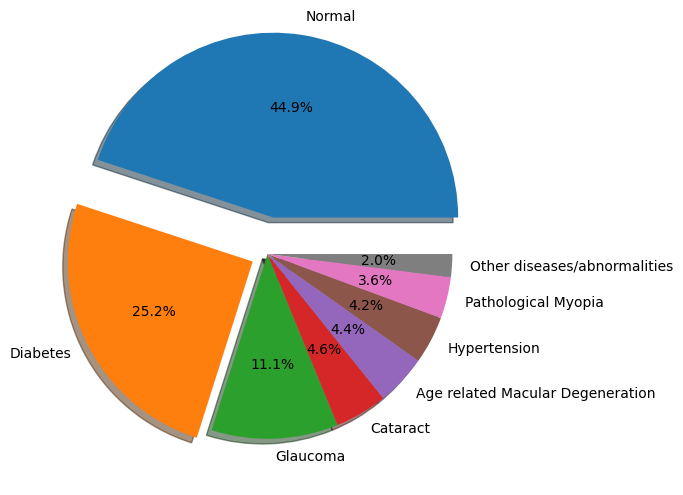

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df['labels'].value_counts(), autopct="%0.1F%%",
       labels=['Normal','Diabetes','Glaucoma','Cataract','Age related Macular Degeneration','Hypertension',
                'Pathological Myopia','Other diseases/abnormalities'],
       shadow=True, explode=[0.2, 0.09, 0,0,0,0,0,0])

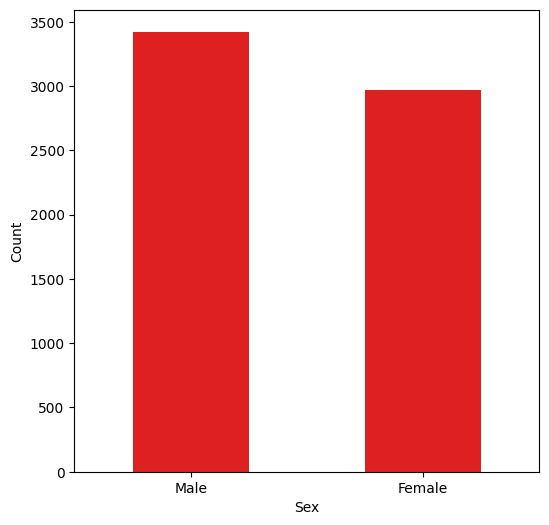

In [ ]:
sex_counts = df['Patient Sex'].value_counts().reset_index()

sex_counts.columns = ['Sex', 'Count']

plt.figure(figsize=(6,6))
sns.barplot(x='Sex', y='Count', data=sex_counts, color='r', width=0.5)
plt.show()

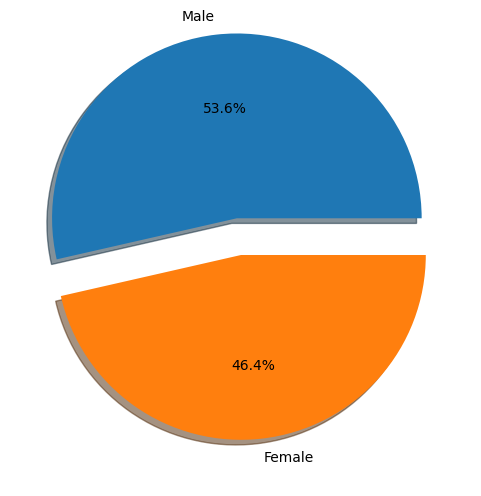

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df['Patient Sex'].value_counts(), autopct="%0.1F%%",
       labels=['Male', 'Female'], shadow=True, explode=[0.2,0])
plt.show()

In [ ]:
real_values = ["['N']", "['D']", "['O']", "['M']", "['H']", "['C']", "['A']",
       "['G']"]
df['labels'].unique()

array(["['N']", "['D']", "['O']", "['M']", "['H']", "['C']", "['A']",
       "['G']"], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder   #coverts non numerical value to numerical
encoder = LabelEncoder()
df['labels'] = encoder.fit_transform(df['labels'])

In [ ]:
df['labels'] = df['labels'].astype(str)

In [ ]:
left_images = df[['Left-Fundus','labels']]
Right_images = df[['Right-Fundus', 'labels']]

left_images.columns = ['image', 'target']
Right_images.columns = ['image', 'target']

left_images

,image,target
0,0_left.jpg,6
1,1_left.jpg,6
2,2_left.jpg,2
3,4_left.jpg,2
4,5_left.jpg,2
...,...,...
6387,4686_left.jpg,2
6388,4688_left.jpg,2
6389,4689_left.jpg,2
6390,4690_left.jpg,2


In [ ]:
combined_df = pd.concat([left_images, Right_images])
combined_df = combined_df.dropna(subset='image')
combined_df

,image,target
0,0_left.jpg,6
1,1_left.jpg,6
2,2_left.jpg,2
3,4_left.jpg,2
4,5_left.jpg,2
...,...,...
6387,4686_right.jpg,2
6388,4688_right.jpg,2
6389,4689_right.jpg,2
6390,4690_right.jpg,2


In [ ]:
train_df,test_df = train_test_split(combined_df, test_size=0.2, random_state=42)
train_df.head()

,image,target
5328,3007_right.jpg,6
108,128_right.jpg,7
4023,950_left.jpg,6
3189,4686_right.jpg,2
1494,2231_right.jpg,1


In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = '/kaggle/input/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Training Images',
    x_col = 'image',
    y_col = 'target',
    subest = 'training',
    class_mode = 'categorical',
    target_size = (224,224),
    batch_size = 16
)

Found 10227 validated image filenames belonging to 8 classes.


In [ ]:
validation_generator = datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = '/kaggle/input/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Training Images',
    x_col = 'image',
    y_col = 'target',
    class_mode = 'categorical',
    target_size = (224,224),
    batch_size = 32
)

Found 2557 validated image filenames belonging to 8 classes.


!pip install -U efficientnet          

**installed efficientnet locally because the kernel was not able to import efficientnet from tensorflow.keras.applications**

In [ ]:
input_layer = Input(shape=(224,224,3))        #edit this cell

inceptionv3 = InceptionV3(weights='imagenet', include_top=False)(input_layer)
gop = GlobalAveragePooling2D()(inceptionv3)
                                                                       

dense1 = Dense(512, activation='relu')(gop)    #why 4 dense layers and why relu activation
dense2 = Dense(256, activation='relu')(dense1)
dense3 = Dense(128, activation='relu')(dense2)
dense4 = Dense(64, activation='relu')(dense3)

output_layer = Dense(8, activation='softmax')(dense4)  #visualize this and why softmax here?

model = Model(inputs = input_layer, outputs = output_layer)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model.compile(optimizer= Adam(learning_rate=0.0001),                 #understand everthing from this
             loss='categorical_crossentropy',
             metrics=[
                 Recall(name="recall"),
                 Precision(name="Precision"),
                 "accuracy"
             ])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,024,872 (87.83 MB)

 Trainable params: 22,990,440 (87.70 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [ ]:
# checkpoint_filepath = '/kaggle/working/checkpoint.weights.h5'    
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath = checkpoint_filepath,
#     save_weights_only = True,
#     monitor = 'val_loss',
#     mode='min',
#     save_best_only=True)
# )
# history = model.fit(train_generator, epochs=10, validation_data=validation_data-generator, callbacks=[model_checkpoint_callback])
# history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callback = [early_stopping])

history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


640/640 ━━━━━━━━━━━━━━━━━━━━ 414s 526ms/step - Precision: 0.5498 - accuracy: 0.4717 - loss: 1.4585 - recall: 0.2078 - val_Precision: 0.6401 - val_accuracy: 0.5675 - val_loss: 1.1630 - val_recall: 0.4521
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 221s 342ms/step - Precision: 0.6654 - accuracy: 0.5886 - loss: 1.1052 - recall: 0.4547 - val_Precision: 0.6402 - val_accuracy: 0.5765 - val_loss: 1.1272 - val_recall: 0.4822
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 229s 354ms/step - Precision: 0.7383 - accuracy: 0.6661 - loss: 0.9239 - recall: 0.5734 - val_Precision: 0.6588 - val_accuracy: 0.6140 - val_loss: 1.1025 - val_recall: 0.5565
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 223s 345ms/step - Precision: 0.7653 - accuracy: 0.7118 - loss: 0.7953 - recall: 0.6405 - val_Precision: 0.6983 - val_accuracy: 0.6445 - val_loss: 1.0564 - val_recall: 0.5722
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 222s 344ms/step - Precision: 0.8034 - accuracy: 0.7586 - loss: 0.6566 - recall: 0.7069 - val_Precision: 0.6840 - va

In [ ]:
model.save("netra-ai-model.h5")

NameError: name 'model' is not defined